<div style="background-color:white;padding:20px;">
    <h1 style="text-align:center;font-family:Georgia, serif;font-size:36px;color:#1e90ff;">Meteorite Threat Identification</h1>
    <p style="text-align:center;font-family:Georgia, serif;font-size:18px;color:#008080;margin:0;padding:0;">Author: Praanshu Chaurasia &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp; Date: 2023-04-27 &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp; Version: 1.0</p>
</div>

# Introduction
A meteorite is a solid piece of debris from an object, such as a comet, asteroid, or meteoroid, that originates in outer space.To date, Nearly 28,000 near-Earth objects have been discovered by survey telescopes in close proximity to the Earth, with roughly 3,000 new discoveries every year. Sometimes, these meteors come very close to Earth’s future position and, because of small uncertainties in their positions, a future Earth impact cannot be completely ruled out. The last time a big meteorite crashed into Earth, it changed the climatic conditions so dramatically that it lead to the extinction of dinosaurs from Planet Earth. </br>

Scientists have been studying about meteorites for a long time. The scientists have realized that applying Machine learning can help them identify the threats much more efficiently, 

# Objective
The Task is to build a Machine Learning model that predicts whether or not an asteroid will be dangerous (or not!).

# Importing the required Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

from sklearn.model_selection import  train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler



warnings.filterwarnings("ignore")
%matplotlib inline

# Imporing the dataset

In [25]:
data=pd.read_csv(r'train_dataset.csv')
test_data=pd.read_csv(r'test_dataset.csv')

In [26]:
# Creating a copy of pandas dataframe
df = data.copy()

In [27]:
#Displaying 10 ramdom rows from the data
df.sample(10)

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
1698,29.2,0.003842,0.008591,3.841979,8.590926,0.002387,0.005338,12.604918,28.185454,9.280396,...,5.816977,55.601662,294.643221,0.512464,227.343517,1.220656,2.458027e+06,328.133941,1.221817,0
3176,21.4,0.139494,0.311918,139.493823,311.917671,0.086677,0.193817,457.656914,1023.351970,39.058752,...,2.121514,136.773832,441.340958,0.298909,101.928106,1.969983,2.457858e+06,116.191663,0.815696,1
2920,20.6,0.201630,0.450858,201.629919,450.858206,0.125287,0.280150,661.515505,1479.193637,17.071768,...,5.208499,205.242573,319.089304,0.537258,211.130108,1.290446,2.456373e+06,330.298455,1.128211,1
3,17.7,0.766576,1.714115,766.575574,1714.115092,0.476328,1.065101,2515.011805,5623.737359,2.335267,...,7.012588,354.475923,1036.204307,1.259659,105.208870,2.748343,2.457681e+06,111.130550,0.347422,0
1340,19.4,0.350393,0.783502,350.392641,783.501764,0.217724,0.486845,1149.582193,2570.543928,32.330052,...,22.716025,120.313480,529.116553,0.570163,270.942232,1.990379,2.457546e+06,172.830329,0.680379,0
302,18.0,0.667659,1.492932,667.659413,1492.931834,0.414864,0.927665,2190.483710,4898.070480,15.978699,...,8.687526,252.174760,743.323311,0.680742,200.482142,2.531066,2.457875e+06,60.854071,0.484311,0
1946,25.4,0.022108,0.049436,22.108281,49.435619,0.013737,0.030718,72.533733,162.190357,10.699217,...,7.105162,337.634947,393.591580,0.893191,79.530457,1.208949,2.458143e+06,229.844039,0.914654,0
955,22.8,0.073207,0.163697,73.207399,163.696720,0.045489,0.101716,240.181763,537.062748,8.397962,...,15.963422,58.373131,677.576090,1.158052,21.642212,1.861458,2.457790e+06,111.748279,0.531306,0
1481,26.7,0.012149,0.027167,12.149404,27.166893,0.007549,0.016881,39.860251,89.130231,10.329850,...,0.990745,146.955552,721.626479,0.875724,232.504044,2.273276,2.458328e+06,196.766038,0.498873,0
3244,22.3,0.092163,0.206082,92.162655,206.081961,0.057267,0.128053,302.370925,676.121942,7.983296,...,13.349062,87.897557,507.912756,1.051887,253.764820,1.439783,2.458055e+06,321.646452,0.708783,0


# Data description:
<table>
  <tr>
    <th>Data name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Neo Reference ID</td>
    <td>This feature denotes the reference ID assigned to an asteroid.</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>This feature denotes the name given to an asteroid.</td>
  </tr>
  <tr>
    <td>Absolute Magnitude</td>
    <td>Denotes the absolute magnitude of an asteroid.</td>
  </tr>
  <tr>
    <td>Est Dia in KM(min)</td>
    <td>Estimated diameter of the asteroid in kilometres (KM).</td>
  </tr>
  <tr>
    <td>Relative Velocity km per sec</td>
    <td>This feature denotes the relative velocity of the asteroid in kilometre per second.</td>
  </tr>
  <tr>
    <td>Orbiting Body</td>
    <td>This feature denotes the planet around which the asteroid is revolving.</td>
  </tr>
  <tr>
    <td>Eccentricity</td>
    <td>Denotes the value of eccentricity of the asteroid’s orbit.</td>
  </tr>
  <tr>
    <td>Semi Major Axis</td>
    <td>Denotes the value of the Semi Major Axis of the asteroid’s orbit.</td>
  </tr>
  <tr>
    <td>Orbital Period</td>
    <td>Refers to the time taken by the asteroid to make one full revolution around its orbiting body.</td>
  </tr>
  <tr>
    <td>Perihelion Distance</td>
    <td>Denotes the point of least distance for a body orbiting the Sun.</td>
  </tr>
  <tr>
    <td>Aphelion Dist</td>
    <td>Denotes the point of greatest distance for a body orbiting the Sun.</td>
  </tr>
  <tr>
    <td>Hazardous (Target Variable)</td>
    <td>Helps us identify whether the asteroid is hazardous or not.</td>
  </tr>
</table>


# Data Analysis

In [28]:
# Getting shape of data
df.shape

(3280, 33)

In [29]:
# Getting column names
df.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

We see that there are multiple duplicate columns. We will also remove them. We will try to also keep the units similar.

In [30]:
# Dropping Similar Column names
to_drop = [ 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec','Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)','Miss Dist.(miles)', 'Orbit ID']
df = df.drop(to_drop, axis=1)
test_data=test_data.drop(to_drop,axis=1)

In [31]:
df.shape

(3280, 21)

We  see that the columns are reduced from 33 to 21.

In [32]:
# Checking for NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           3280 non-null   float64
 1   Est Dia in KM(min)           3280 non-null   float64
 2   Est Dia in KM(max)           3280 non-null   float64
 3   Relative Velocity km per hr  3280 non-null   float64
 4   Miss Dist.(kilometers)       3280 non-null   float64
 5   Orbit Uncertainity           3280 non-null   int64  
 6   Minimum Orbit Intersection   3280 non-null   float64
 7   Jupiter Tisserand Invariant  3280 non-null   float64
 8   Epoch Osculation             3280 non-null   float64
 9   Eccentricity                 3280 non-null   float64
 10  Semi Major Axis              3280 non-null   float64
 11  Inclination                  3280 non-null   float64
 12  Asc Node Longitude           3280 non-null   float64
 13  Orbital Period    

In [33]:
# There are no NULL values in the dataset.
df.isnull().sum()

Absolute Magnitude             0
Est Dia in KM(min)             0
Est Dia in KM(max)             0
Relative Velocity km per hr    0
Miss Dist.(kilometers)         0
Orbit Uncertainity             0
Minimum Orbit Intersection     0
Jupiter Tisserand Invariant    0
Epoch Osculation               0
Eccentricity                   0
Semi Major Axis                0
Inclination                    0
Asc Node Longitude             0
Orbital Period                 0
Perihelion Distance            0
Perihelion Arg                 0
Aphelion Dist                  0
Perihelion Time                0
Mean Anomaly                   0
Mean Motion                    0
Hazardous                      0
dtype: int64

# Feature Engineering

In [34]:
#Seprating the target column and Other columns
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']

In [35]:
# Splitting the dataset in test and train variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<AxesSubplot: >

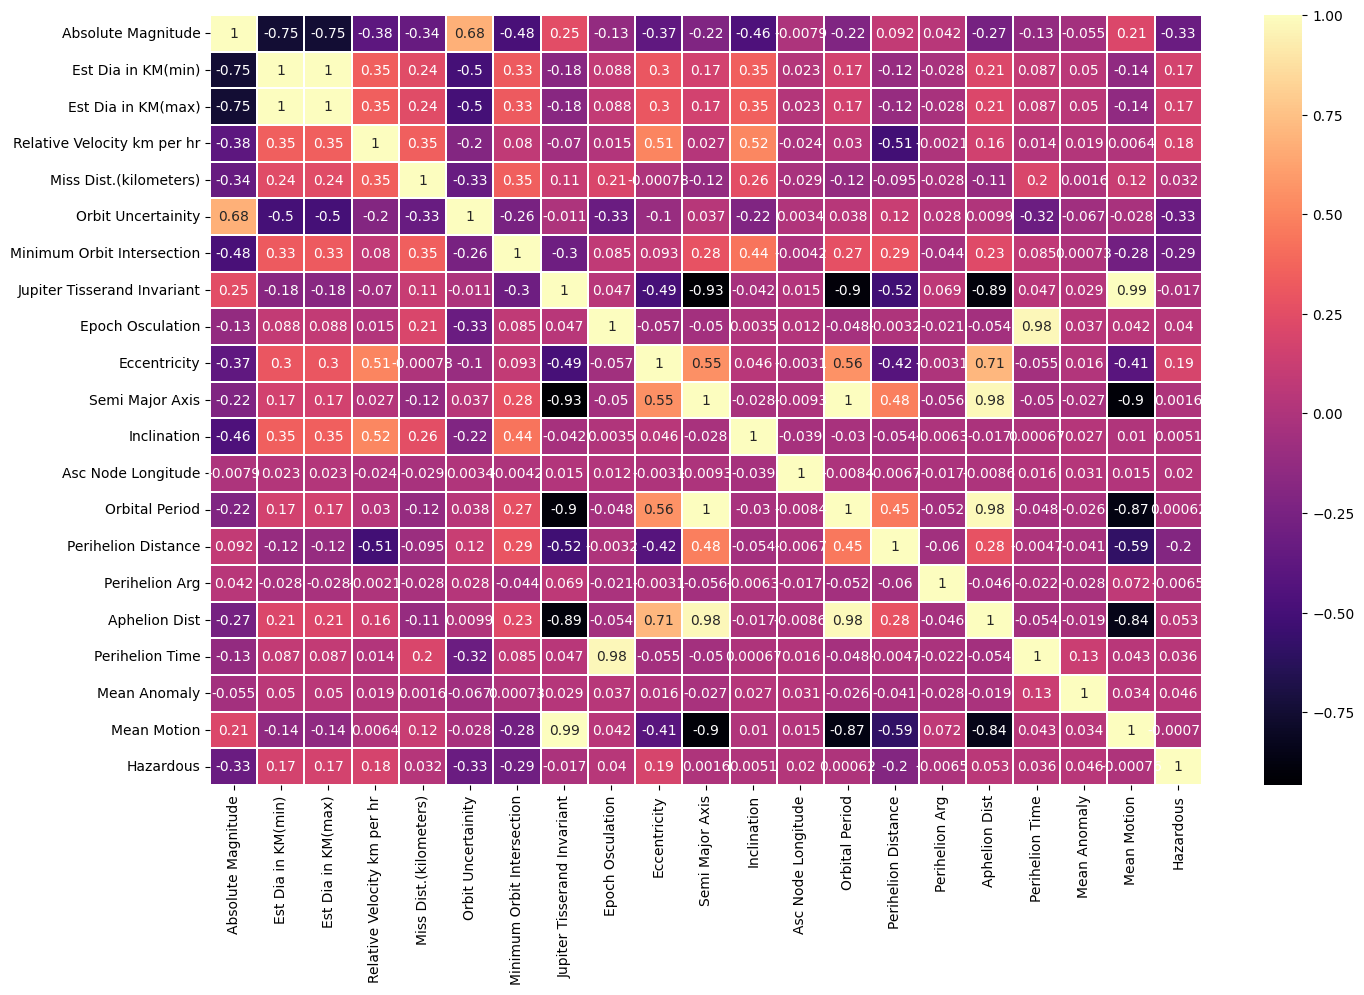

In [36]:
#Correlation Matrix
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='magma',linewidths=0.2) 

We are plotting correlation matrix to find high correlation between columns. This can make it difficult for the model to identify the independent contribution of each variable to the outcome. In the presence of multicollinearity, the model may assign too much importance to some variables and too little to others, leading to incorrect predictions. We will remove the features with high multicollinearity.

In [37]:
# Function to gather correlated variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
# We will remove the correlated features
corr_features = correlation(X_train, 0.8)
corr_features

{'Aphelion Dist',
 'Est Dia in KM(max)',
 'Mean Motion',
 'Orbital Period',
 'Perihelion Time',
 'Semi Major Axis'}

In [39]:
# Dropping the correlated variables from the train and test dataframe
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
test_data.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((2460, 14), (820, 14))

### Checking for the imbalance in the dataset

<AxesSubplot: xlabel='Hazardous', ylabel='count'>

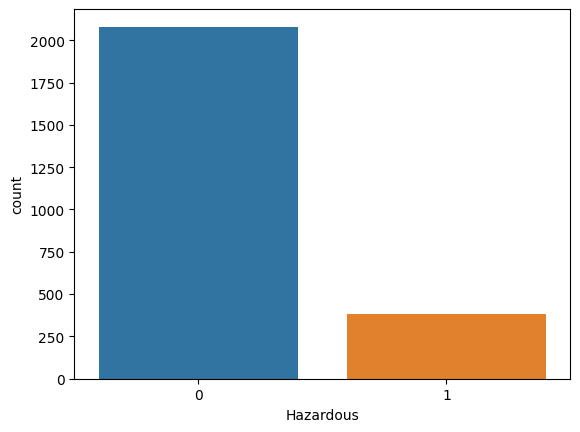

In [40]:
# Count plot for the y_train
sns.countplot(x=y_train)

We see that since, the dataset is highly imbalanced, we will resample the minority class,it can help improve the performance of a machine learning model. In an imbalanced dataset, the number of examples in each class is not equal, which can lead to a biased model that performs poorly on the minority class. Resampling techniques are used to balance the distribution of examples across the classes, allowing the model to learn more effectively from the minority class.

In [41]:
# We will use SMOTETomek to handle the imbalace data.
def resampling_min_class(X_train, y_train):
    # Resampling the minority class. The strategy can be changed as required.
    smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
    # Fit the model to generate the data.
    X_res, y_res = smt.fit_resample(X_train, y_train)
    
    return X_res,y_res

In [42]:
X_res, Y_res = resampling_min_class(X_train, y_train)

<AxesSubplot: xlabel='Hazardous', ylabel='count'>

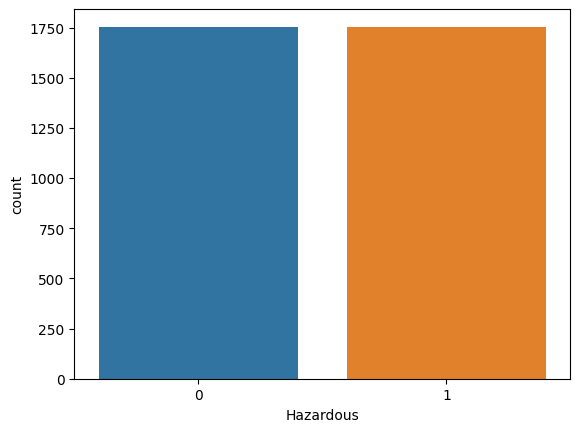

In [43]:
# From the countplot we see that resampling is done
sns.countplot(x=Y_res)

In [44]:
X_train1=X_res.copy()
y_train1=Y_res.copy()

In [45]:
# We will scale the data
def scaler_standard(X_train, X_test,test_data):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    test_data_scaled = scaler.transform(test_data)
    return X_train_scaled, X_test_scaled,test_data_scaled

In [46]:
X_train_scaled, X_test_scaled,test_data_scaled = scaler_standard(X_train1, X_test,test_data)
#X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [47]:
X_train2=X_train_scaled.copy()
X_test2=X_test_scaled.copy()

# Training the Model

In [49]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print(f'- Accuracy: {model_train_accuracy:.4f}')
        print(f'- F1 score: {model_train_f1:.4f}')
        print(f'- Precision: {model_train_precision:.4f}')
        print(f'- Recall: {model_train_recall:.4f}')
        print(f'- Roc Auc Score: {model_train_rocauc_score:.4f}')

        print('Model performance for Test set')
        print(f'- Accuracy: {model_test_accuracy:.4f}')
        print(f'- F1 score: {model_test_f1:.4f}')
        print(f'- Precision: {model_test_precision:.4f}')
        print(f'- Recall: {model_test_recall:.4f}')
        print(f'- Roc Auc Score: {model_test_rocauc_score:.4f}')
        
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [50]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [51]:

# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [52]:
report_knn = evaluate_models(X_train2, X_test2, y_train1, y_test, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
Model performance for Test set
- Accuracy: 0.9951
- F1 score: 0.9866
- Precision: 0.9800
- Recall: 0.9932
- Roc Auc Score: 0.9944


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
Model performance for Test set
- Accuracy: 0.9963
- F1 score: 0.9899
- Precision: 0.9866
- Recall: 0.9932
- Roc Auc Score: 0.9951


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
Model performance for Test set
- Accuracy: 0.9951
- F1 score: 0.9866
- Precision: 0.9800
- Recall: 0.9932
- Roc Auc Score: 0.9944


Logistic Regression
Model performance for Training set
- Accuracy: 0.9655
- F1 score: 0.9663
- Precision: 0.9450
- Recall: 0.9886
- Roc Auc Score: 0.9655
Mo

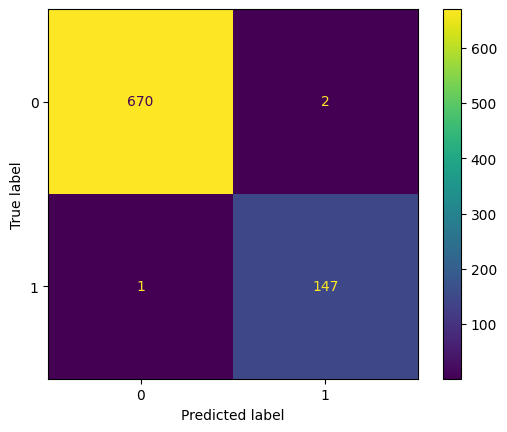

In [53]:
# Plots Confusion matrix for Decision Tree
final_model = DecisionTreeClassifier()
final_model.fit(X_train2, y_train1)
predictions = final_model.predict(X_test2)
cm = confusion_matrix(y_test, predictions, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()
plt.show()

From our analysis we see that Decision Tree gives the best model performance for Test set:
- Accuracy: 0.9963
- F1 score: 0.9899
- Precision: 0.9866
- Recall: 0.9932
- Roc Auc Score: 0.9951

In [55]:
# Predicting the test data

predictions = final_model.predict(test_data_scaled)
# convert predictions to a pandas dataframe and add a column named "Hazardous"
df_test_predicted = pd.DataFrame(predictions, columns=["Hazardous"])
# save the dataframe as a CSV file
df_test_predicted .to_csv("predictions.csv", index=False)